<a href="https://colab.research.google.com/github/SanariaM/data_analytics_2-/blob/main/salaries_Unit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Salaries_df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(Salaries_df)

pandas.core.frame.DataFrame

In [5]:
Salaries_df.shape

(397, 7)

In [6]:
Salaries_df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
Salaries_df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
Salaries_df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


## **Mean/median of all salaries**

In [9]:
print(Salaries_df)

     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


In [10]:
Salaries_df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [11]:
Salaries_df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [12]:
Salaries_df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

In [13]:
Salaries_df.groupby('sex').transform('median')
print(Salaries_df)

     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


**Median salary between gender and/or rank(title) Etc...**

Making a new Data Frame that only has the columns 'sex' and 'salary'

In [14]:

print(Salaries_df.groupby(["sex","rank"]).median())

                  Unnamed: 0  yrs.since.phd  yrs.service    salary
sex    rank                                                       
Female AssocProf       170.5           13.0          9.5   90556.5
       AsstProf        128.0            5.0          3.0   77000.0
       Prof            190.0           23.0         17.0  120257.5
Male   AssocProf       172.0           11.5          8.0   95626.5
       AsstProf        159.5            4.0          3.0   80182.0
       Prof            223.0           28.0         22.0  123996.0


In [15]:
 data = {'sex': ['Female,Male']}
print(Salaries_df.groupby(["sex",]).median())

        Unnamed: 0  yrs.since.phd  yrs.service    salary
sex                                                     
Female       149.0           17.0         10.0  103750.0
Male         202.5           22.0         18.0  108043.0


In [16]:
new_df = Salaries_df[["sex" , "salary"]]
new_df.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


In [17]:
male_df= new_df[(new_df['sex'] == 'Male')]

In [18]:
male_df['salary'].median()

108043.0

In [19]:
female_df = new_df[(new_df['sex'] == 'Female')]

In [20]:
female_df['salary'].median()

103750.0

In [21]:

female_df = new_df[(new_df['sex'] == 'Female')]

In [22]:
female_df['salary'].mean()

101002.41025641025

In [23]:
male_df['salary'].mean()

115090.41899441341

In [24]:
diff = male_df['salary'].mean()-female_df['salary'].mean()
print(diff)

14088.008738003162


**Data Wrangling – perform some basic transformations on the data**

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [72]:
experience_20 = Salaries_df[["yrs.service","salary"]]


In [73]:
df= experience_20[experience_20["yrs.service"]>=20]
print(df.count().to_string())


yrs.service    157
salary         157


In [27]:
(df[["yrs.service", "salary"]].mean()

yrs.service        31.057325
salary         122520.656051
dtype: float64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [28]:
less_20 = experience_20[experience_20["yrs.service"]<20]
print((less_20).mean())

yrs.service         8.820833
salary         107940.504167
dtype: float64


In [29]:
diff = df.mean()[['salary']]-less_20.mean()[['salary']]
print(diff)

salary    14580.151884
dtype: float64


People who have salary of greater than or equal to 200,**000**

In [30]:
grater_200k = experience_20[experience_20['salary']>=200000]
print(grater_200k.count())

yrs.service    3
salary         3
dtype: int64


**Conclusion**

The median years service for all males is 18.

The median years service for all females is 10.

The median salary for all females is 103750.0.

The median salary for all males is 108043.0.

The difference between mean salaries of male and female is 14088.01.

People gets $14580.15 more salary if they're experinence over 20 years.

3 People have salary of greater than or equal to 200,000.




**Rename values, subset columns, etc**


In [32]:
Rename_df = Salaries_df
print(Rename_df)


     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


**Create some simple visualizations showing some simple statistics**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


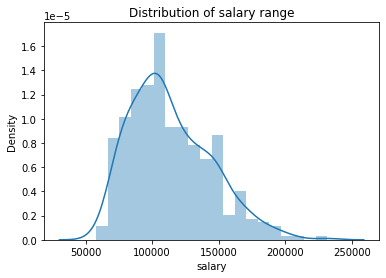

In [74]:
import seaborn as sns
sns.distplot(Salaries_df['salary'],bins =20)
plt.title('Distribution of salary range')
plt.show()

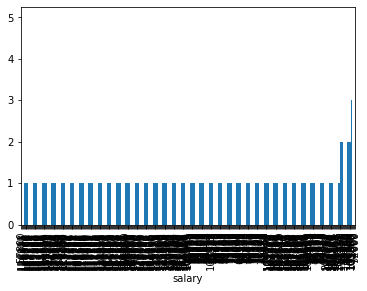

In [75]:
Salaries_df.groupby(['salary'])['sex'].count().sort_values(ascending=True).plot(kind='bar')

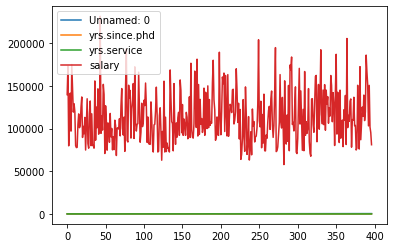

In [76]:
Salaries_df.plot()

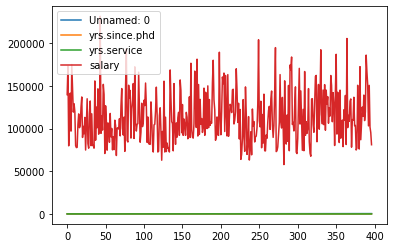

In [77]:
Salaries_df.plot(kind='line')

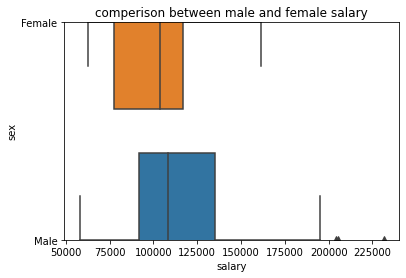

In [36]:
sns.boxplot(x = 'salary', y = 'sex', data = Rename_df)
plt.ylim(0,1)
plt.title('comperison between male and female salary')
plt.show()

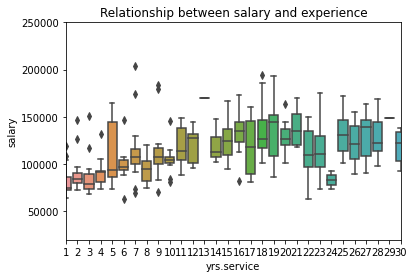

In [38]:
sns.boxplot(x = 'yrs.service', y = 'salary', data = experience_20)
plt.ylim(20000,250000)
plt.xlim(1,30)
plt.title('Relationship between salary and experience')
plt.show()

**Draw some conclusions based on the data. What did you discover?**

Males' and females' salaries are different, also the males have more years of service than females.

I also discovered that the -
professors who have experience earn more salaries.